# Introduction - Machine Learning



*   Approaches (types) to Machine Learning
*   Data Exploration (covered)
*   Algorithm Selection
*   Building Your first ML Model
*   Business Applications



---


Types of Machine Learning:

* Supervised Learning
* Unsupervised Learning

The main difference is one uses labeled data to help predict outcomes, while the other does not.




# Case Study

Your cousin has made millions of dollars speculating on real estate. He's offered to become business partners with you because of your interest in data science. He'll **supply the money**, and you'll **supply models** that predict how much various houses are worth.

You ask your cousin how he's predicted real estate values in the past, and he says it is just intuition. But more questioning reveals that he's identified price patterns from houses he has seen in the past, and he uses those patterns to make predictions for new houses he is considering.

Machine learning works the same way. We'll start with a model called the **Decision Tree**. There are fancier models that give more accurate predictions. But decision trees are easy to understand, and they are the basic building block for some of the best models in data science.

For simplicity, we'll start with the simplest possible decision tree.

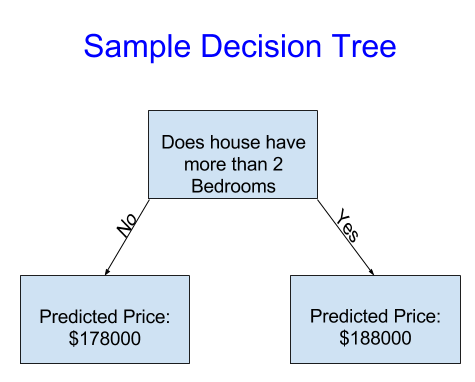



---

It divides houses into only two categories. The predicted price for any house under consideration is the historical average price of houses in the same category.

We use data to decide how to break the houses into two groups, and then again to determine the predicted price in each group. This step of capturing patterns from data is called fitting or training the model. The **data used to fit the model is called the training data.**

The details of how the model is fit (e.g. how to split up the data) is complex enough that we will save it for later. After the model has been fit, you can apply it to new data to predict prices of additional homes.


**Improving the Decision Tree**

Which of the following two decision trees is more likely to result from fitting the real estate training data?



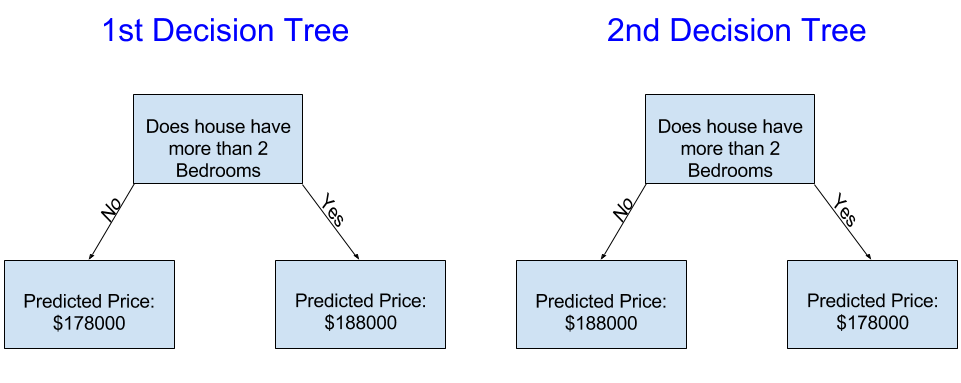

The decision tree on the left (Decision Tree 1) probably makes more sense, because it captures the reality that houses with more bedrooms tend to sell at higher prices than houses with fewer bedrooms. The biggest shortcoming of this model is that it doesn't capture most factors affecting home price, like number of bathrooms, lot size, location, etc.

You can capture more factors using a tree that has more "splits." These are called "deeper" trees. A decision tree that also considers the total size of each house's lot might look like this:


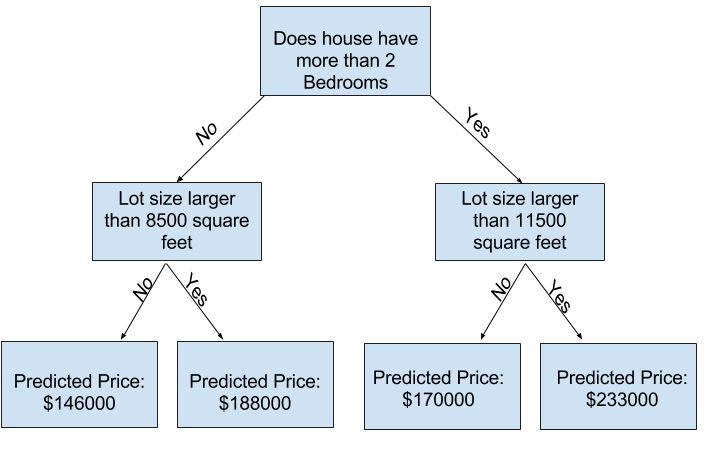


You predict the price of any house by tracing through the decision tree, always picking the path corresponding to that house's characteristics. The predicted price for the house is at the bottom of the tree. The point at the bottom where we make a prediction is called a leaf.

The splits and values at the leaves will be determined by the data, so it's time for you to check out the data you will be working with.

## **Exploratory Data Analysis**

We examine the dataset, but first we need to;

* Get Data
* Data Cleaning
* Data Processing/Preparation

We will use **Pandas**: Pandas is the primary tool data scientists use for exploring and manipulating data.

### **1. Data Extraction** using Wget command

In [ ]:
import pandas as pd

In [ ]:
!wget http://c3-ai-covid19-research.reispartechnologies.com.ng/Melbourne_real_estate_data.zip

--2022-02-18 08:40:48--  http://c3-ai-covid19-research.reispartechnologies.com.ng/Melbourne_real_estate_data.zip
Resolving c3-ai-covid19-research.reispartechnologies.com.ng (c3-ai-covid19-research.reispartechnologies.com.ng)... 192.3.45.50
Connecting to c3-ai-covid19-research.reispartechnologies.com.ng (c3-ai-covid19-research.reispartechnologies.com.ng)|192.3.45.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 461423 (451K) [application/zip]
Saving to: ‘Melbourne_real_estate_data.zip’

Melbourne_real_esta 100%[===================>] 450.61K  1.27MB/s    in 0.3s    

2022-02-18 08:40:49 (1.27 MB/s) - ‘Melbourne_real_estate_data.zip’ saved [461423/461423]



In [ ]:
!unzip Melbourne_real_estate_data.zip

Archive:  Melbourne_real_estate_data.zip
  inflating: melb_data.csv           


In [ ]:
df = pd.read_csv('melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
df.shape

(13580, 21)

In [ ]:
df.isna()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
13576,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
13577,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
13578,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(f'Number of rows: {df.shape[0]}; Number of columns: {df.shape[1]}; Number of missing values: {sum(df.isna().sum())}')

Number of rows: 13580; Number of columns: 21; Number of missing values: 13256


In [ ]:
df.isna().sum()  #sum all missing values/cells in our dataset

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
df.Price.value_counts() 

1100000.0    113
1300000.0    109
650000.0     109
800000.0     109
600000.0     104
            ... 
1928000.0      1
2236000.0      1
601500.0       1
550500.0       1
1323000.0      1
Name: Price, Length: 2204, dtype: int64

In [ ]:
#df.set_index('STORE', inplace=True)
#df.head()

In [ ]:
#df.reset_index()

In [ ]:
#dy = df.sort_values(['Price'], ascending=False, axis=0, inplace=True)

### **2. Handling Missing Values**

In [ ]:
dft = df.copy(deep=True)
dft

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
dft.shape

(13580, 21)

**Approach A** for handling missing values (drop them)

In [ ]:
drop_missing_values= dft.dropna() #dropna removes rows that contain empty cells
drop_missing_values

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,3.0,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,3.0,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,1.0,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,2.0,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


In [ ]:
drop_missing_values.shape

(6196, 21)

**Approach B - for handling missing values** replace empty cells/values *(can either be mean, median, mode or random or 0)*

In [ ]:
dfy = df.copy(deep=True) #T in True must be capital letter

In [ ]:
dfy.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
drop_missing_values2 = dfy.fillna(0) #means replace any empty cell with 0

In [ ]:
drop_missing_values2.shape #checking

(13580, 21)

In [ ]:
drop_missing_values2.isna().sum() #we have replaced with zero

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# **Building Your First ML Model**

In [ ]:
#recall we now have three dataframes to chose
#df, drop_missing_values, drop_missing_values2
#we can use any of these, however it's best to make use of the dataframe we have cleaned

Using `drop_missing_values2` dataframe for Modeling

In [ ]:
drop_missing_values2.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## **Selecting the Prediction Target** - dot notation

Let's predict Price in this dataset.

We create a variable with dot-notation. This single column is stored in a Series, which is broadly like a DataFrame with only a single column of data.

We'll use the dot notation to select the column we want to predict, which is called the **prediction target**. **By convention, the prediction target is called y**. 

The code we need to save the house prices in the Melbourne data is;


In [ ]:
melb_data = drop_missing_values2 #change of variable name for easy identification
melb_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,0.0,0.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,0.0,0.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,0.0,1981.0,0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,0,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,0.0,1997.0,0,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,0,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
y = melb_data.Price

## **Choosing Features**

The columns we input  into our model (and later used to make predictions) are called **"features."** In this exapmple, these would be the columns used to determine the home price. *Sometimes, you will use all columns except the target as features.* Other times you'll be better off with fewer features.

For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.

We select multiple features by providing a list of column names inside brackets. Each item in that **list should be a string** (with quotes). By convention, this **data is called X**.

Here is an example:

In [ ]:
melb_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
melb_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude'] #a list in a variable

By convention, this data is called X.

In [ ]:
X = melb_data[melb_features]
#melb_dat is the main dataframe
#melb_features (are the selected columns we intend to use to predict price)

Let's explore the data we'll be using to predict house prices using the describe method and the head method, which shows the top few rows.

In [ ]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.534242,558.416127,-37.809203,144.995216
std,0.955748,0.691712,3990.669241,0.079260,0.103916
min,1.000000,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,1.000000,177.000000,-37.856822,144.929600
50%,3.000000,1.000000,440.000000,-37.802355,145.000100
75%,3.000000,2.000000,651.000000,-37.756400,145.058305
max,10.000000,8.000000,433014.000000,-37.408530,145.526350


In [ ]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
0,2,1.0,202.0,-37.7996,144.9984
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
3,3,2.0,94.0,-37.7969,144.9969
4,4,1.0,120.0,-37.8072,144.9941


## **Modeling with ScikitLearn** (data in dataframes)

The steps to building and using a machine learning model are:

* **Define/Algorithm Selection**: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.

* **Fit:** Capture patterns from provided data. This is the heart of modeling.

* **Predict:** Test your model and predict 

* **Evaluate:** Determine how accurate the model's predictions are.

Using **Decision Trees** (Regression under Supervised Learning)

In [ ]:
from sklearn.tree import DecisionTreeRegressor #import library

# Define model. Specify a number for random_state to ensure same results each run
melb_model = DecisionTreeRegressor(random_state=1) #DecisionTreeRegressor() 

#Fit model
melb_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

### **Explaining Randomness in ML Modelling**

Many machine learning models allow some randomness in model training. Specifying a number for **random_state ensures you get the same results in each run**. This is considered a good practice. You use any number, **and model quality won't depend meaningfully on exactly what value you choose**.

We **now have a fitted model** that we can use to make predictions.

**In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for**. But *we'll make predictions for the first few rows of the training data to see how the predict function works*.

In [ ]:
melb_model.predict(X.head())

array([1480000., 1035000., 1465000.,  850000., 1600000.])

In [ ]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melb_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
0      2       1.0     202.0   -37.7996    144.9984
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
3      3       2.0      94.0   -37.7969    144.9969
4      4       1.0     120.0   -37.8072    144.9941
The predictions are
[1480000. 1035000. 1465000.  850000. 1600000.]


# **Model Validation**

It's good to evaluate almost every model you build. The relevant measure of model quality is **predictive accuracy**, *however this isn't true for all cases*. In other words, will the model's predictions be close to what actually happens?

We sometimes make huge mistake when measuring predictive accuracy. We might make predictions with their **training data** and compare those predictions to the target values in the training data. This is wrong.

For example;

We first need to summarize the model quality into an understandable way. Say you compare predicted and actual home values for 10,000 houses, you'll likely find mix of good and bad predictions. Looking through a list of 10,000 predicted and actual values would be pointless. **We need to summarize this into a single metric.**

There are **many metrics for summarizing model quality**, let's start with **Mean Absolute Error (also called MAE)**. 

The prediction error for each house is:

In [ ]:
#simply
# error=actual−predicted

So, if a house cost `$150,000 and you predicted it would cost $ 100,000 the error is $50,000.`

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality.

## **Calculate MAE Metric**

In [ ]:
from sklearn.metrics import mean_absolute_error

predicted_house_prices = melb_model.predict(X)
mean_absolute_error(y, predicted_house_prices)

1125.1804614629357

### **Challenges of this Approach** - In Sample Score Error

We used the training dataset for testing which is wrong.

The measure we just computed can be called an "in-sample" score. We used a single "sample" of houses for both building the model and evaluating it. Here's why this is bad.

Imagine that, in the large real estate market, door color is unrelated to home price.

However,* in the sample of data you used to build the model, all homes with green doors were very expensive. The model's job is to find patterns that predict home prices, so it will see this pattern, and it will always predict high prices for homes with green doors.*

Since this pattern was derived from the training data, the model will appear accurate in the training data.

But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice.

**Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model.** The most *straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before*. This data is called **validation data**.

# **Building a Model & Separate Test Dataset**

The scikit-learn library has a function **train_test_split** to break up the data into two pieces. *We'll use some of that data as training data to fit the model*, and *we'll use the other data as validation data to calculate mean_absolute_error*.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

#Define model
melb_model = DecisionTreeRegressor(random_state=1)

#Fit model
melb_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [ ]:
## get predicted prices on validation data
val_predictions = melb_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

241632.16966126655


# **Model findings & Accuracy**


Our mean absolute error for the **in-sample data** *(using trained data for testing model)* was about `1,125 dollars`. **Out-of-sample** *(using separate test data on the trained model)* it is more than `241, 632 dollars`.

This is the difference between a model that is almost exactly right, and one that is unusable for most practical purposes. 

As a point of reference, the average home value in the validation data is 1.1 million dollars. So the error in new data is about a quarter of the average home value.

**There are many ways to improve this model, such as experimenting to find better features or different model types.**

## **Underfitting & Overfitting**

Now that you have a reliable way to measure model accuracy, you can experiment with alternative models and see which gives the best predictions. But what alternatives do you have for models?

You can see in scikit-learn's documentation that the decision tree model has many options (more than you'll want or need for a long time). The most important options determine the tree's depth. Recall from the first lesson in this course that a tree's depth is a measure of how many splits it makes before coming to a prediction. This is a relatively shallow tree

**Overfitting:** Where a model matches the training data almost perfectly, but does poorly in validation and other new data. 

When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called **Underfitting**.

We use **validation data**, which isn't used in model training, to measure a candidate model's accuracy.

# **Random Forest Algorithm** - Machine Learning I

In [ ]:
#load data (we are using previously loaded data)
import pandas as pd

In [ ]:
#feature selection

melb_features = ['Rooms', 'Bathroom', 'Landsize', 
                 'Lattitude', 'Longtitude'] 

X = melb_data[melb_features]

In [ ]:
y = melb_data.Price

In [ ]:
#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

This random forest model is similar to the decision tree in scikit-learn -but this time we are making use of the **RandomForestRegressor** class instead of **DecisionTreeRegressor**.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

Rforest_model = RandomForestRegressor(random_state=1)

In [ ]:
Rforest_model.fit(train_X, train_y) #train the model

In [ ]:
melb_predictions = forest_model.predict(val_X) #predicting on the test data test

In [ ]:
print(mean_absolute_error(val_y, melb_predictions)) #print model evaluation results

#**Conclusion**

Obvioulsy, we can further improve this model, though there seems to be some good improvement over the best decision tree error of ...... 

There are parameters which enables us room to modify the performance of the Random Forest much as we changed the maximum depth of the single decision tree. 

One advantage of Random Forest models features is that they generally work reasonably even without this tuning.

# **Assignment**

Perform this trend analytics task on [**RT Opensquare** ](https://rtopensquare.reispartechnologies.com.ng/)

Steps:



*   https://rtopensquare.reispartechnologies.com.ng/ - **click on login** to create a new account.
*   **Create** a new account
*   Check your **email for login confirmation**
*   **Goto projects** - create a new project
*   **Upload Data** (csv only) in this format; the columns must be labelled (ds, y), 

**ds** is the datatime column

**y** is the value for trend prediction (could be sales, orders etc).

Contact info@reispartechnologies.com.ng for support.

Always check your spam folder.



# **Resources/References:**

[Machine Learning Types](https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning#:~:text=The%20main%20difference%20between%20supervised,unsupervised%20learning%20algorithm%20does%20not.)

[How Models Work](https://www.kaggle.com/dansbecker/how-models-work/tutorial)

